In [1]:
from sklearn.model_selection import train_test_split
from preamble import *
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib as plt
import mglearn
from scipy import sparse
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import RandomizedPCA

In [2]:


df = pd.read_csv("C:/Users/Kapila/Desktop/Macquarie coursework/COMP777 Computing Methods of Research/Final Project/Dataset/OnlineNewsPopularity/OnlineNewsPopularity.csv") #Reading the dataset in a dataframe using Pandas

df.loc[df['shares'] <= 1400, 'split'] = 'Unpopular'
df.loc[df['shares'] > 1400, 'split'] = 'Popular'

df['split']

0        Unpopular
1          Popular
2        Unpopular
3        Unpopular
4        Unpopular
5        Unpopular
6        Unpopular
7        Unpopular
8          Popular
9        Unpopular
10         Popular
11         Popular
12       Unpopular
13         Popular
14       Unpopular
15         Popular
16         Popular
17         Popular
18         Popular
19         Popular
20         Popular
21       Unpopular
22       Unpopular
23         Popular
24       Unpopular
25       Unpopular
26         Popular
27         Popular
28       Unpopular
29       Unpopular
           ...    
39614    Unpopular
39615      Popular
39616      Popular
39617    Unpopular
39618    Unpopular
39619    Unpopular
39620      Popular
39621      Popular
39622      Popular
39623    Unpopular
39624      Popular
39625    Unpopular
39626    Unpopular
39627    Unpopular
39628    Unpopular
39629      Popular
39630      Popular
39631    Unpopular
39632      Popular
39633      Popular
39634    Unpopular
39635    Unp

In [3]:
df.shape

(39644, 62)

In [4]:
#removing the attributes url and timedelta which are non predictive variables
dfr12 = df.iloc[:, 2:60]
print(dfr12)

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                  12               219             0.66               1.0   
1                   9               211             0.58               1.0   
2                   9               255             0.60               1.0   
3                   9               531             0.50               1.0   
4                  13              1072             0.42               1.0   
5                  10               370             0.56               1.0   
6                   8               960             0.42               1.0   
7                  12               989             0.43               1.0   
8                  11                97             0.67               1.0   
9                  10               231             0.64               1.0   
10                  9              1248             0.49               1.0   
11                 10               187             0.67        

In [5]:
data=dfr12

In [6]:
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,...,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12,219,0.66,1.0,...,0.50,-0.19,0.00,0.19
1,9,211,0.58,1.0,...,0.00,0.00,0.50,0.00
2,9,255,0.60,1.0,...,0.00,0.00,0.50,0.00
3,9,531,0.50,1.0,...,0.00,0.00,0.50,0.00
4,13,1072,0.42,1.0,...,0.45,0.14,0.05,0.14


In [7]:
target=  df.iloc[:,61]

In [8]:
target.head()

0    Unpopular
1      Popular
2    Unpopular
3    Unpopular
4    Unpopular
Name: split, dtype: object

In [9]:
print(target)

0        Unpopular
1          Popular
2        Unpopular
3        Unpopular
4        Unpopular
5        Unpopular
6        Unpopular
7        Unpopular
8          Popular
9        Unpopular
10         Popular
11         Popular
12       Unpopular
13         Popular
14       Unpopular
15         Popular
16         Popular
17         Popular
18         Popular
19         Popular
20         Popular
21       Unpopular
22       Unpopular
23         Popular
24       Unpopular
25       Unpopular
26         Popular
27         Popular
28       Unpopular
29       Unpopular
           ...    
39614    Unpopular
39615      Popular
39616      Popular
39617    Unpopular
39618    Unpopular
39619    Unpopular
39620      Popular
39621      Popular
39622      Popular
39623    Unpopular
39624      Popular
39625    Unpopular
39626    Unpopular
39627    Unpopular
39628    Unpopular
39629      Popular
39630      Popular
39631    Unpopular
39632      Popular
39633      Popular
39634    Unpopular
39635    Unp

In [10]:
print("Type of data: {}".format(type(df)))
print("Type of data: {}".format(type(data)))
print("Type of data: {}".format(type(target)))

Type of data: <class 'pandas.core.frame.DataFrame'>
Type of data: <class 'pandas.core.frame.DataFrame'>
Type of data: <class 'pandas.core.series.Series'>


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=0)

In [12]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (29733, 58)
y_train shape: (29733,)


In [13]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (9911, 58)
y_test shape: (9911,)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
#predicting on test data
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 ['Unpopular' 'Popular' 'Popular' ..., 'Popular' 'Popular' 'Unpopular']


In [16]:

print ( "Test set score: {:.2f}" . format ( np . mean ( y_pred  ==  y_test )))

Test set score: 0.57


In [17]:

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.57


In [18]:
#accuracy on training data
y_pred = knn.predict(X_train)
print("Train set predictions:\n {}".format(y_pred))

Train set predictions:
 ['Unpopular' 'Unpopular' 'Popular' ..., 'Popular' 'Popular' 'Popular']


In [19]:
print("Train set score: {:.2f}".format(knn.score(X_train, y_train)))

Train set score: 0.72


NameError: name 'train_accuracy' is not defined

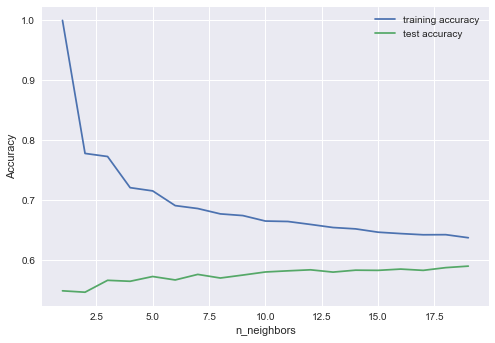

In [24]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 20)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('fig.png')
print(train_accuracy)
print(test_accuracy)

In [21]:
#first scaling the data ,applying knn and then plotting a plot for differnet values of k
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
print("Test set score: {:.2f}".format(knn.score(X_test_scaled, y_test)))

Test set score: 0.60


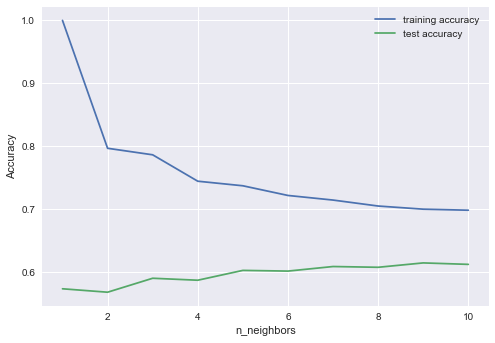

In [23]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train_scaled, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train_scaled, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test_scaled, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('foo.png')